In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

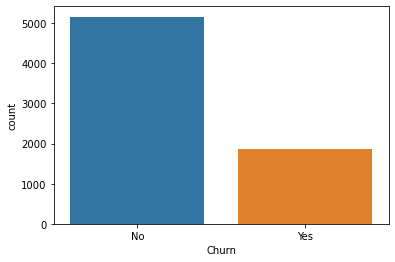

In [7]:
sns.countplot(data=df,x='Churn')

<img src='fig1.png' >

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

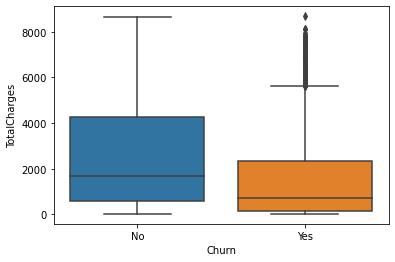

In [8]:
sns.boxplot(x='Churn',y='TotalCharges',data=df)

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

Text(0, 0.5, 'Charges')

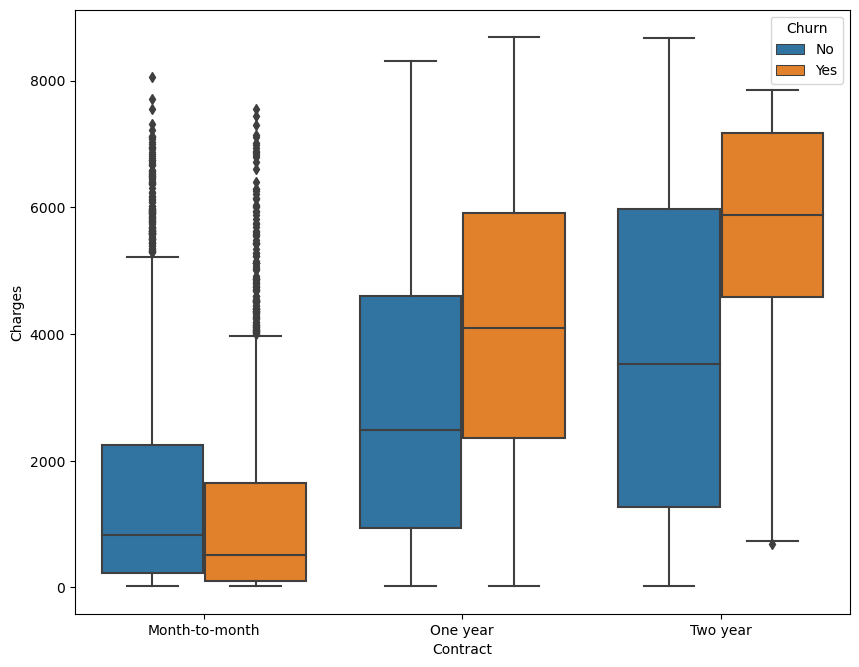

In [9]:
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')
plt.xlabel('Contract')
plt.ylabel('Charges')

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [10]:
df.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
df.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

<AxesSubplot:>

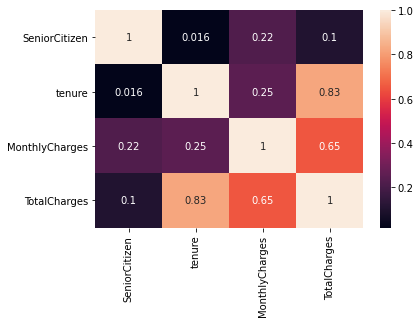

In [12]:
sns.heatmap(data=df.corr(),annot=True)

In [18]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [23]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

In [24]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

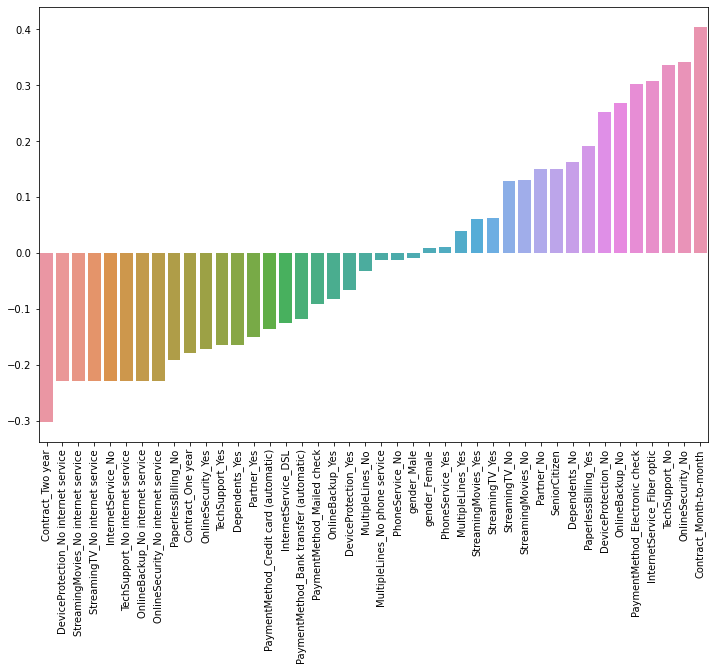

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x=corr_yes_churn.index,y=corr_yes_churn.values)
plt.xticks(rotation=90);

<img src='figbar.png'>

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [31]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

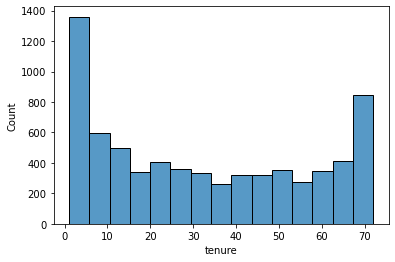

In [32]:
sns.histplot(data=df,x=df['tenure'])

<AxesSubplot:xlabel='gender', ylabel='count'>

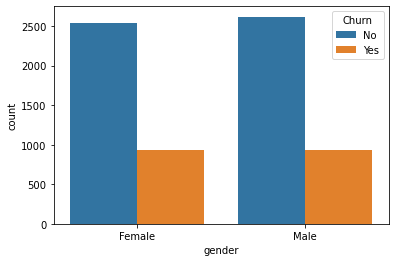

In [37]:
sns.countplot(data=df,x=df['gender'],hue='Churn')

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

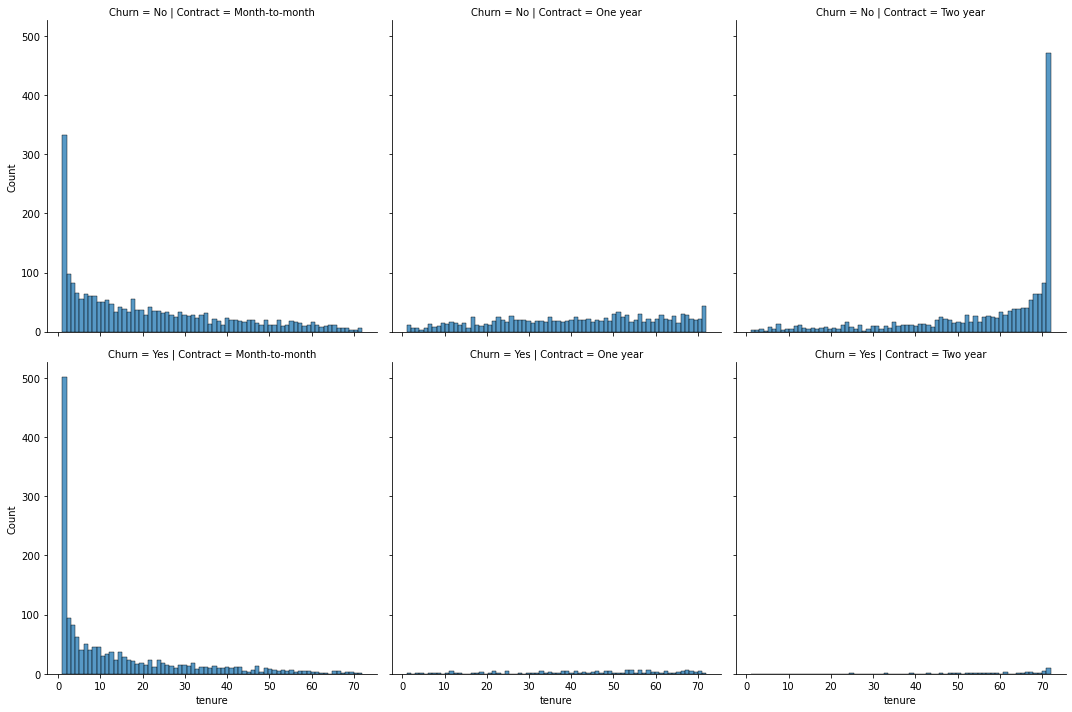

In [58]:
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn')

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

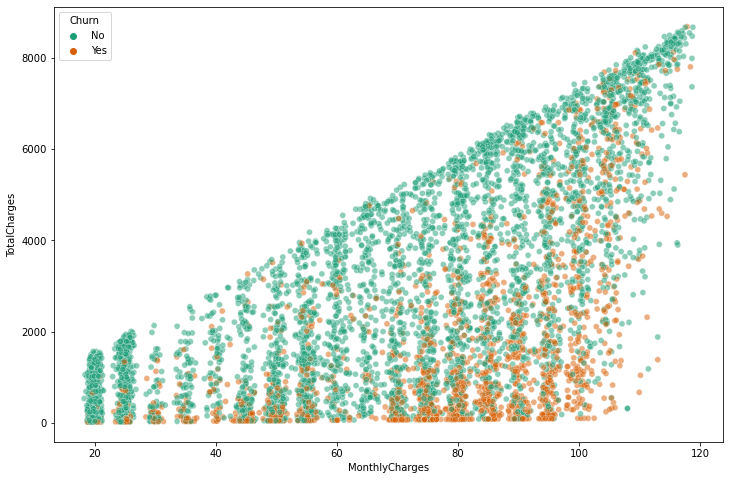

In [65]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['TotalCharges'],x=df['MonthlyCharges'],hue='Churn',data=df,palette='Dark2',alpha=0.5)

In [78]:
df['tenure'].unique()
100*len(df[(df['Churn']=='Yes') & (df['tenure']==1)])/len(df[df['Churn']=='Yes'])

20.331728196896737

In [82]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes'];
no_churn =  df.groupby(['Churn','tenure']).count().transpose()['No']

In [91]:
churn_rate = 100*yes_churn/(yes_churn+no_churn)

In [99]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

<AxesSubplot:xlabel='tenure'>

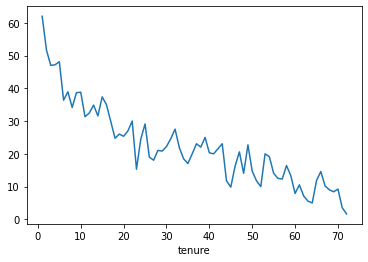

In [107]:
churn_rate.transpose()['customerID'].plot()

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [109]:
def newColum(tenure):
    if tenure <=12:
        return '0-12 Months'
    if (tenure>12) and (tenure<=24):
        return '12-24 Months'
    if (tenure>25) and (tenure<=48):
        return '24-48 Months'
    if tenure >48:
        return 'Over 48 Months'

In [110]:
df['Tenure Cohort'] = df['tenure'].apply(newColum)

In [117]:
df.head(10)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

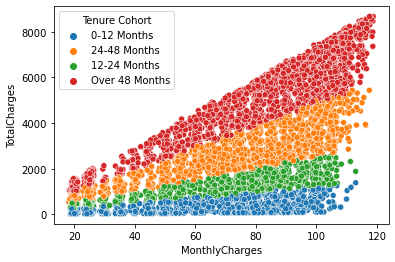

In [120]:
sns.scatterplot(data=df,x=df['MonthlyCharges'],y=df['TotalCharges'],hue=df['Tenure Cohort'])

**TASK: Create a count plot showing the churn count per cohort.**

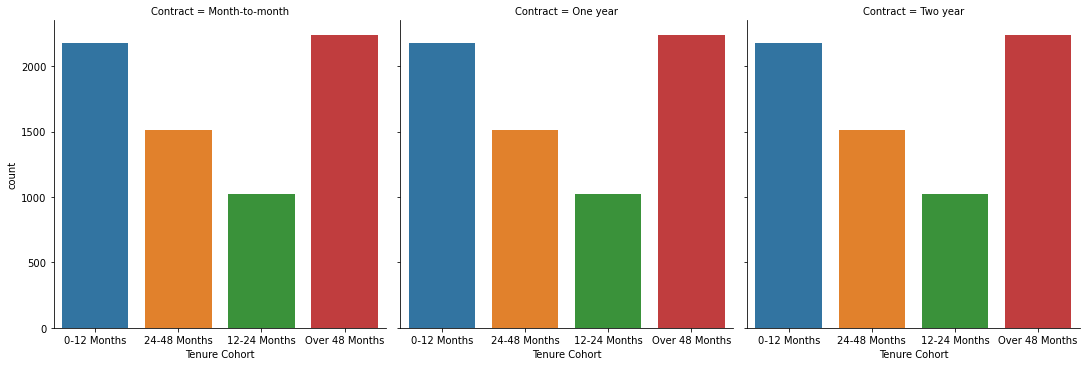

In [126]:
sns.catplot(data=df,x=df['Tenure Cohort'],col='Contract',kind='count')

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

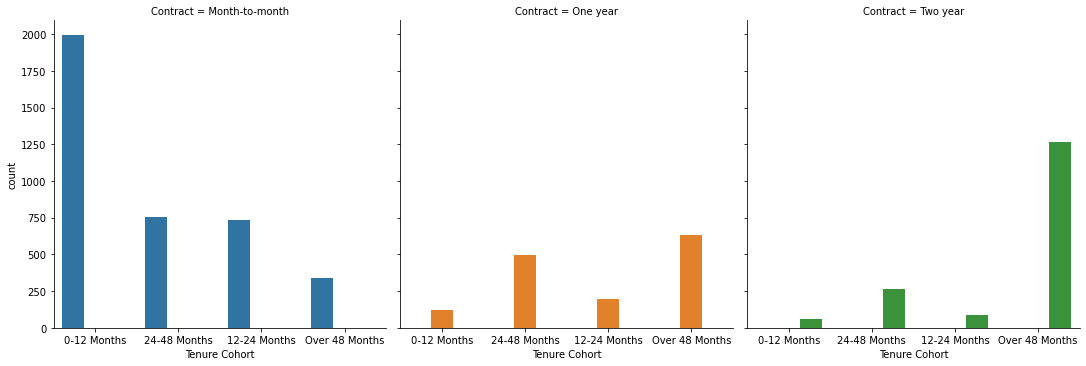

In [135]:
sns.catplot(data=df,x='Tenure Cohort',hue='Contract',kind='count',col='Contract')

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [137]:
X = df.drop(['customerID','Churn'],axis=1)

In [138]:
X = pd.get_dummies(X,drop_first=True)

In [140]:
y = df['Churn']

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [170]:
dt = DecisionTreeClassifier()
param_grid = {'max_depth':[2,4,6,8],'max_features':['auto','sqrt','log2'],'max_leaf_nodes':[2,3,4,5]}
grid_model = GridSearchCV(estimator=dt,param_grid=param_grid)

In [171]:
grid_model.fit(X_train,y_train);

In [172]:
grid_model.best_params_

{'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 5}

In [173]:
test_predict = grid_model.predict(X_test)

In [174]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

          No       0.85      0.94      0.89       557
         Yes       0.60      0.37      0.46       147

    accuracy                           0.82       704
   macro avg       0.72      0.65      0.67       704
weighted avg       0.80      0.82      0.80       704



              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



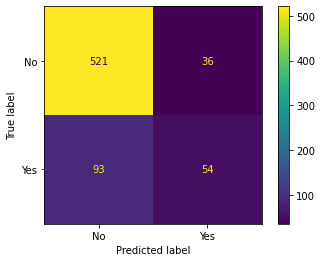

In [176]:
plot_confusion_matrix(grid_model,X_test,y_test)

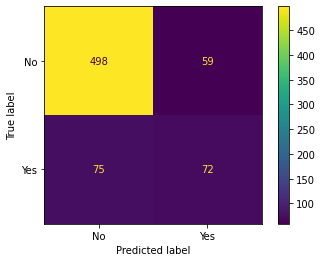

In [190]:
imp_feature = pd.DataFrame(data=grid_model.best_estimator_.feature_importances_,index=X.columns,columns=['Feature Importance'])

In [191]:
imp_feature = imp_feature.sort_values('Feature Importance')

In [192]:
imp_feature = imp_feature[imp_feature['Feature Importance']>0]

In [193]:
imp_feature

,Feature Importance
InternetService_No,0.174944
OnlineSecurity_Yes,0.176198
tenure,0.214197
Contract_Two year,0.434661


Text(0.5, 0, 'column Name')

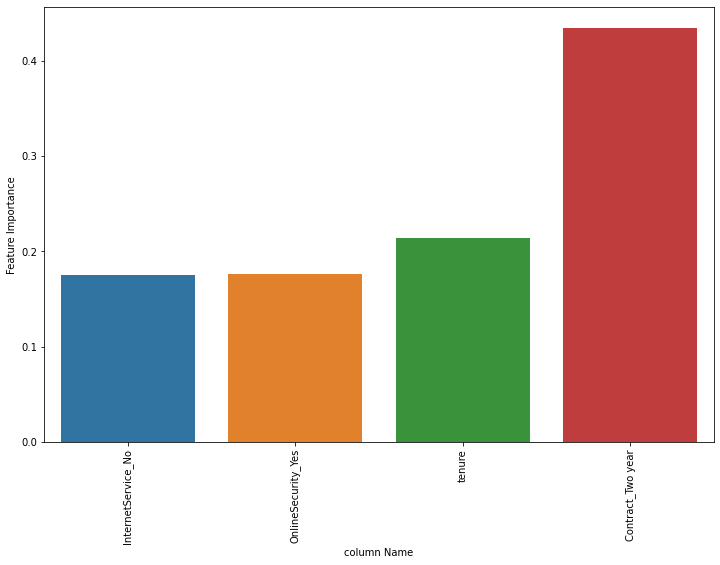

In [196]:
plt.figure(figsize=(12,8))
sns.barplot(data=imp_feature,x=imp_feature.index,y=imp_feature['Feature Importance'])
plt.xticks(rotation=90);
plt.ylabel('Feature Importance')
plt.xlabel('column Name')

In [197]:
from sklearn.tree import plot_tree

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [200]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rfc = RandomForestClassifier(max_depth=6)

In [207]:
rfc.fit(X_train,y_train)
test_predict = rfc.predict(X_test)

In [208]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

          No       0.86      0.93      0.89       557
         Yes       0.61      0.43      0.50       147

    accuracy                           0.82       704
   macro avg       0.74      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



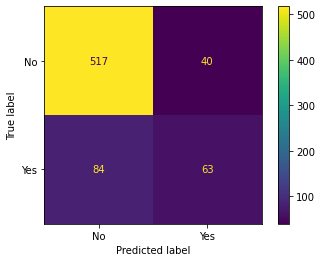

In [209]:
plot_confusion_matrix(rfc,X_test,y_test)

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [205]:
from sklearn.ensemble import AdaBoostClassifier

In [210]:
ada = AdaBoostClassifier()

In [211]:
ada.fit(X_train,y_train)
test_predict = ada.predict(X_test)

In [212]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



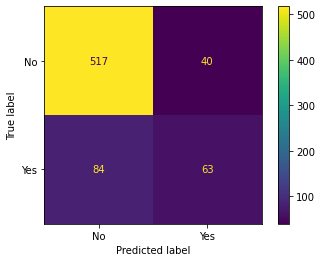

In [213]:
plot_confusion_matrix(rfc,X_test,y_test)

In [214]:
from sklearn.ensemble import GradientBoostingClassifier

In [215]:
gbc = GradientBoostingClassifier()

In [216]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [217]:
test_predict = ada.predict(X_test)

In [218]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



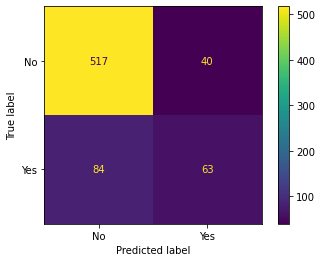

In [219]:
plot_confusion_matrix(rfc,X_test,y_test)

In [220]:
from sklearn.svm  import SVC

In [221]:
svc = SVC()

In [222]:
param_grid = {'C':np.logspace(0,20),'kernel':['linear', 'poly', 'rbf'],'degree':[2,3,5],'gamma':['scale','auto']}

In [ ]:
grid_model = GridSearchCV(estimator=svc,param_grid=param_grid)
grid_model.fit(X_train,y_train)
test_predict = grid_model.predict(X_test)
print(classification_report(y_test,test_predict))
plot_confusion_matrix(grid_model,X_test,y_test)

### Great job!